## 1. Setup

### 1.1 Environment/Imports

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

### 1.2 Read in data

In [3]:
dbase = '../assets/Preprocessed Data.xlsx'
data = pd.read_excel(dbase, sheet='Sheet1')

data.head()

,Author,Description,Long,Performance,Quality,Submission Date,Rating Date,One Year Date,Ticker,FDS Ticker,...,logPE,logPsales,logPFCF,logMKT,logEV,logROIC,MKT_category,Sentiment_polarity,Sentiment_subjectivity,Outperformed
1,Den1200,the purchase of BRK (and shorting out downsid...,True,3.9,2.6,2016-08-23,2016-09-06,2017-09-06,BRK.A,BRK.B,...,2.639003,0.489930,3.017299,12.813473,12.896157,1.999010,Large Cap,0.120324,0.429861,1
1,piggybanker,"that the stock of 1-800-Flowers.com, Inc (FLW...",True,4.3,4.0,2013-10-16,2013-10-30,2014-10-30,FLWS,FLWS,...,3.228965,-0.793357,4.770579,4.949525,5.995618,2.256795,Small Cap,0.131239,0.502589,1
2,shoon1022,"FLWS has an enterprise value of $215mm, but I...",True,3.4,3.8,2011-02-20,2011-03-06,2012-03-05,FLWS,FLWS,...,0.000000,-1.316094,0.000000,4.330223,5.381191,0.000000,Small Cap,0.103768,0.380808,0
3,xds68,2017\n \nRecommending Seaboard\nSeaboard is a ...,True,0.0,0.0,2016-08-23,2016-09-06,2017-09-06,SEB,SEB,...,2.635309,-0.474458,2.675116,8.234805,8.042525,2.034737,Medium Cap,0.063402,0.422381,1
3,u0422811,is pretty simple. Unfortunately due to its s...,False,5.2,4.9,2016-02-15,2016-02-29,2017-02-28,1PG,1PG-AU,...,0.000000,0.000000,0.000000,5.889505,5.603921,0.000000,Small Cap,0.121530,0.490904,0


### 1.3 Separate into long/short datasets

In [4]:
data_long = data[data['Long'] == True]
data_short = data[data['Long'] == False]

#limit to priced data
data_long = data_long[data_long['One Year Date']< datetime.now()]
data_short = data_short[data_short['One Year Date']< datetime.now()]

data_long = data_long[data_long['Outperformance'].notnull()]
data_short = data_short[data_short['Outperformance'].notnull()]

## 2. Data Vizualization/Exploration

In [5]:
data_long.describe()

,Performance,Quality,Submission Price,Rating Price,One Year Price,Submission Index Price,Rating Index Price,One Year Index Price,PE,Psales,...,Desc length,logPE,logPsales,logPFCF,logMKT,logEV,logROIC,Sentiment_polarity,Sentiment_subjectivity,Outperformed
count,4487.000000,4487.000000,4.487000e+03,4.487000e+03,4.487000e+03,4487.000000,4487.000000,4487.000000,4.487000e+03,4487.000000,...,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000
mean,2.496100,3.587230,8.726655e+03,8.318939e+03,1.669526e+03,1487.134819,1490.209153,1574.310210,3.099424e+13,23.522452,...,12989.321819,1.646251,0.156202,1.414172,6.606198,6.551395,1.177654,0.087397,0.429001,0.427457
std,2.515899,2.217508,4.789493e+05,4.510404e+05,4.315060e+04,358.529591,358.712826,405.846307,2.076151e+15,912.406265,...,7509.752329,1.664628,1.173636,1.564112,2.296988,2.866412,1.329534,0.039214,0.043408,0.494765
min,0.000000,0.000000,0.000000e+00,1.234567e-04,1.234567e-04,676.530000,676.530000,682.550000,0.000000e+00,0.000000,...,0.000000,-5.283807,-11.075075,-3.712416,-3.997799,-4.165175,-4.501694,-0.166667,0.000000,0.000000
25%,0.000000,0.000000,6.515000e+00,6.670000e+00,5.845000e+00,1254.190000,1254.690000,1266.691000,0.000000e+00,0.227259,...,7300.000000,0.000000,-0.383592,0.000000,5.037003,4.988783,0.000000,0.063656,0.402951,0.000000
50%,2.900000,4.500000,1.491200e+01,1.500000e+01,1.476000e+01,1416.510000,1416.250000,1494.810000,7.737500e+00,0.848569,...,11174.000000,2.046079,0.000000,1.135314,6.449604,6.736020,0.895703,0.087083,0.430133,0.000000
75%,5.000000,5.300000,3.116107e+01,3.129000e+01,3.217333e+01,1809.600000,1831.370000,1995.150000,1.761944e+01,1.987657,...,16961.000000,2.869003,0.686957,2.676573,8.071467,8.422620,2.280490,0.111751,0.455765,1.000000
max,7.200000,7.600000,3.187500e+07,3.000000e+07,2.375000e+06,2130.820000,2130.820000,2213.350000,1.390712e+17,59731.676075,...,32743.000000,39.473762,10.997618,9.325826,19.196035,18.851058,6.672709,0.500000,0.700000,1.000000


### 2.1 Quick summary

In [6]:
print 'Percentage of outperformers in Long group is: {0:.2f}%'.format(float(data_long['Outperformed'].sum())/len(data_long)*100)
print len(data_long)
print "Long write-ups average outperformance: {0:.2f}%".format(data_long['Outperformance'].mean()*100)
print 'Number of Long write-ups is: {}'.format(len(data_long))
print
print 'Percentage of outperformers in Short group is: {0:.2f}%'.format(float(data_short['Outperformed'].sum())/len(data_short)*100)
print data_short['Outperformed'].sum()
print "Short write-ups average outperformance: {0:.2f}%".format(data_short['Outperformance'].mean()*100)
print 'Number of Short write-ups is: {}'.format(len(data_short))

Percentage of outperformers in Long group is: 42.75%
4487
Long write-ups average outperformance: 0.82%
Number of Long write-ups is: 4487

Percentage of outperformers in Short group is: 34.84%
293
Short write-ups average outperformance: -10.67%
Number of Short write-ups is: 841


### 2.2 Full feature pairplot

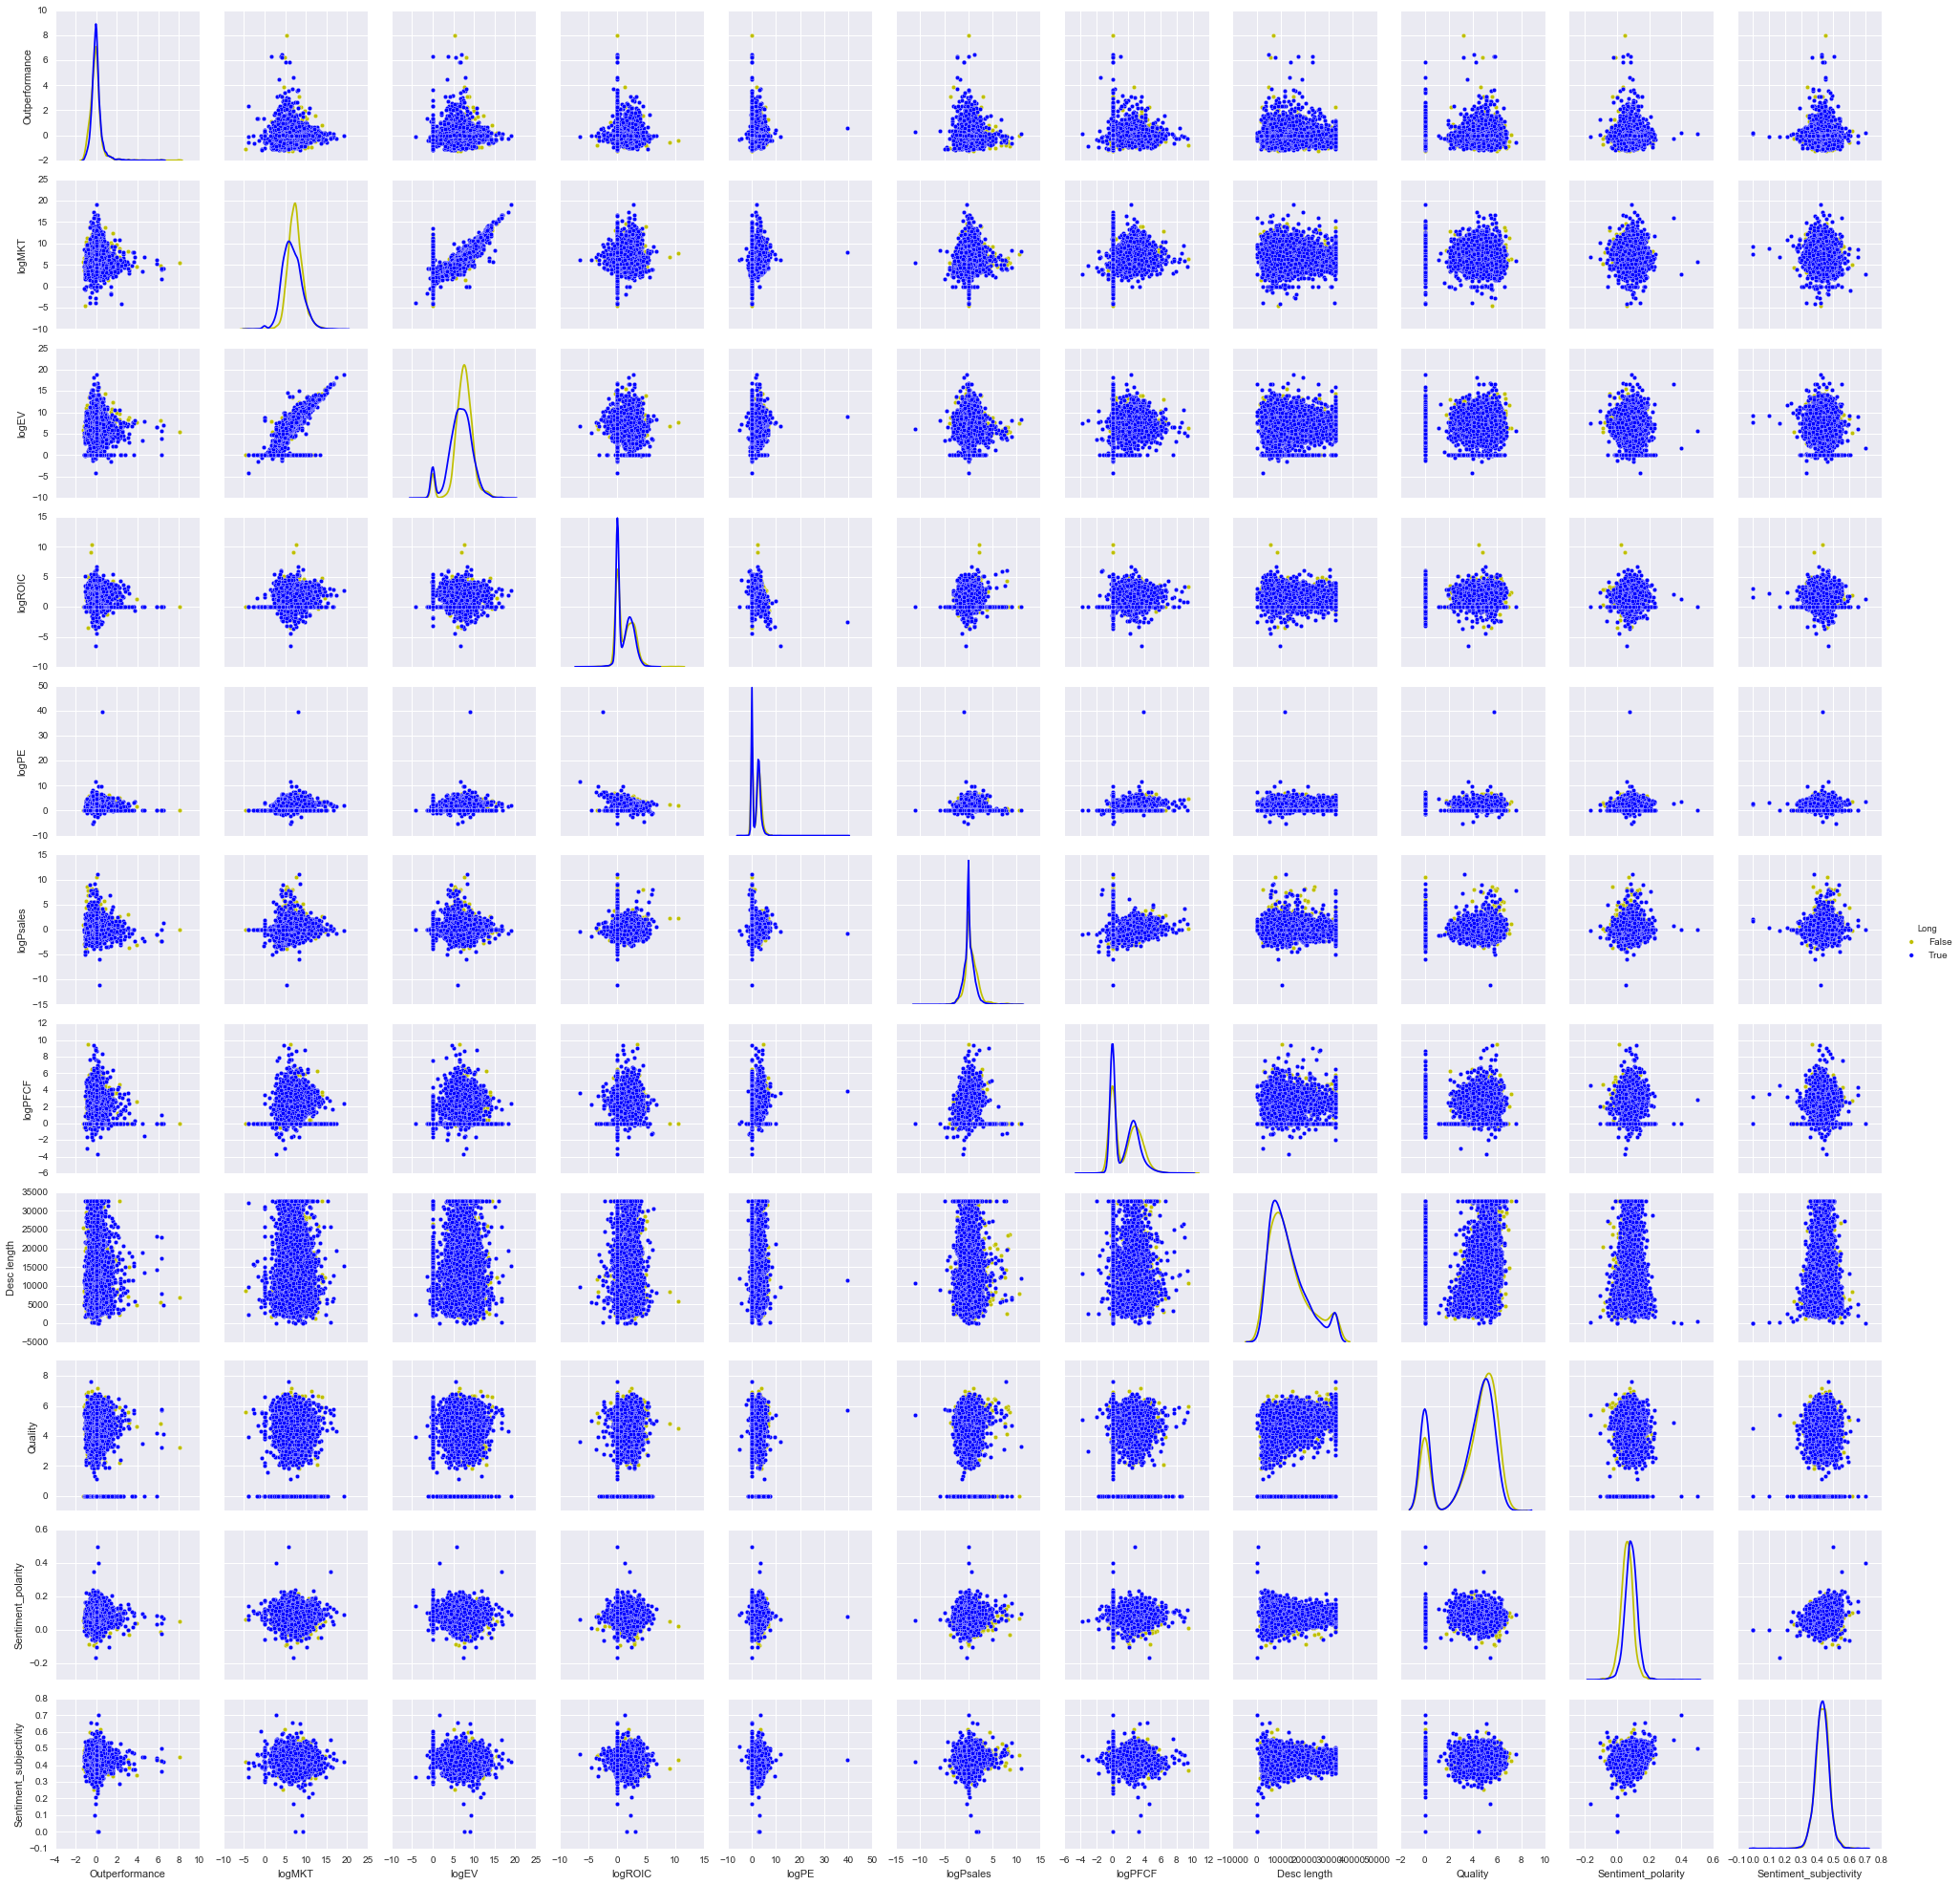

In [7]:
sns.pairplot(data, 
             vars=["Outperformance",'logMKT','logEV','logROIC','logPE','logPsales','logPFCF','Desc length','Quality','Sentiment_polarity','Sentiment_subjectivity'], 
             hue="Long",
             dropna=True,
             palette={True:'b',False:'y'},
             diag_kind="kde")

### 2.3 Performance visualization

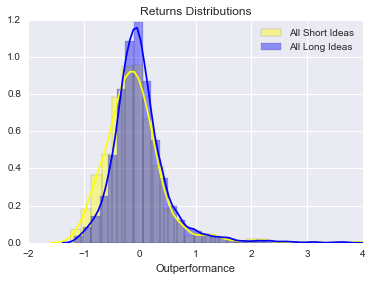

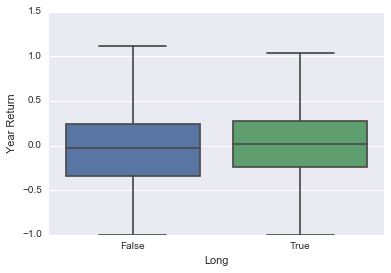

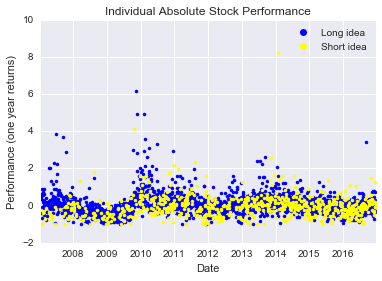

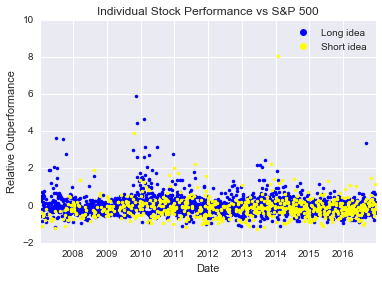

In [8]:
sns.plt.title('Returns Distributions')
sns.distplot(data_short['Outperformance'],color='yellow',label='All Short Ideas')
sns.distplot(data_long['Outperformance'],color='blue',label='All Long Ideas')
sns.plt.xlim(-2,4)
sns.plt.legend()

plt.figure()
sns.boxplot(x = 'Long', y='Year Return',data = data,showfliers=False)
plt.xlabel

timed_short = data_short[['One Year Date','Year Return','Year Index Return','Outperformance']].groupby('One Year Date').agg([np.mean,np.std,len]).reset_index()
timed_long = data_long[['One Year Date','Year Return','Year Index Return','Outperformance']].groupby('One Year Date').agg([np.mean,np.std,len]).reset_index()

date = timed_long['One Year Date']
short_date = timed_short['One Year Date']

performance_mean = np.array(timed_long['Year Return']['mean'])
index_performance_mean = np.array(timed_long['Year Index Return']['mean'])
short_performance_mean = timed_short['Year Return']['mean']
y_mean_short = np.array(timed_long['Year Return'])

plt.figure()
plt.title('Individual Absolute Stock Performance')
plt.plot(date, performance_mean, '.', color = 'blue')
plt.plot(short_date, short_performance_mean, '.', color = 'yellow')
plt.xlabel('Date')
plt.ylabel('Performance (one year returns)')
plt.legend(['Long idea', 'Short idea'],loc='best',markerscale = 2)


long_outperformance_mean = np.array(timed_long['Outperformance']['mean'])
short_outperformance_mean = np.array(timed_short['Outperformance']['mean'])

plt.figure()
plt.title('Individual Stock Performance vs S&P 500')
plt.plot(date, long_outperformance_mean, '.', color = 'blue')
plt.plot(short_date, short_outperformance_mean, '.', color = 'yellow')
plt.xlabel('Date')
plt.ylabel('Relative Outperformance')
plt.legend(['Long idea', 'Short idea'],loc='best',markerscale = 2)

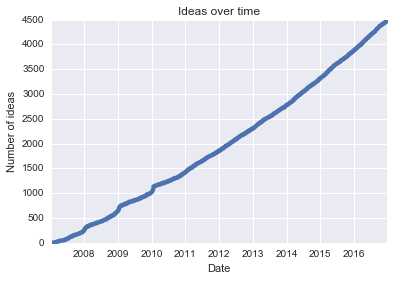

In [9]:
plt.figure()
plt.title('Ideas over time')
plt.plot(date, timed_long['Year Return']['len'].cumsum(), '.')
plt.xlabel('Date')
plt.ylabel('Number of ideas')

### 2.4 Short vs. Long Write-up Sentiment

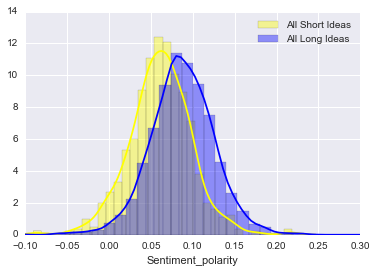

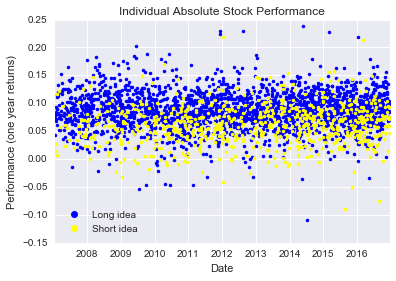

In [10]:
sns.distplot(data_short['Sentiment_polarity'],color='yellow',label='All Short Ideas')
sns.distplot(data_long['Sentiment_polarity'],color='blue',label='All Long Ideas')
sns.plt.xlim(-0.1,0.3)
sns.plt.legend()

timed_short = data_short[['One Year Date','Sentiment_polarity']].groupby('One Year Date').agg([np.mean,np.std,len]).reset_index()
timed_long = data_long[['One Year Date','Sentiment_polarity']].groupby('One Year Date').agg([np.mean,np.std,len]).reset_index()

plt.figure()
plt.title('Individual Absolute Stock Performance')
plt.plot(date, timed_long['Sentiment_polarity']['mean'], '.', color = 'blue')
plt.plot(short_date, timed_short['Sentiment_polarity']['mean'], '.', color = 'yellow')
plt.xlabel('Date')
plt.ylabel('Performance (one year returns)')
plt.legend(['Long idea', 'Short idea'],loc='best',markerscale = 2)

### 2.5 Short vs. Long Write-up Objectivity

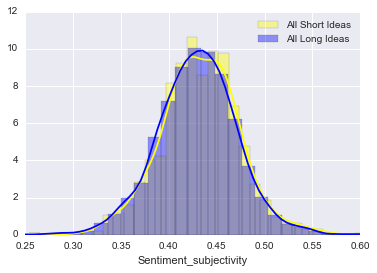

In [11]:
sns.distplot(data_short['Sentiment_subjectivity'],color='yellow',label='All Short Ideas')
sns.distplot(data_long['Sentiment_subjectivity'],color='blue',label='All Long Ideas')
sns.plt.xlim(0.25,0.6)
sns.plt.legend()

### 2.4 Write-up length vs. Outperformance

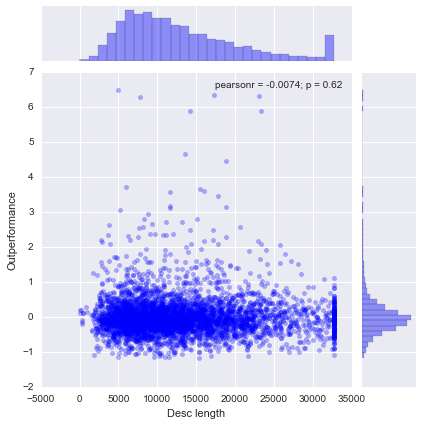

In [12]:
sns.jointplot(data_long['Desc length'],data_long['Outperformance'], color = 'blue',alpha = 0.3)

### 2.5 logPFCF vs. Outperformance

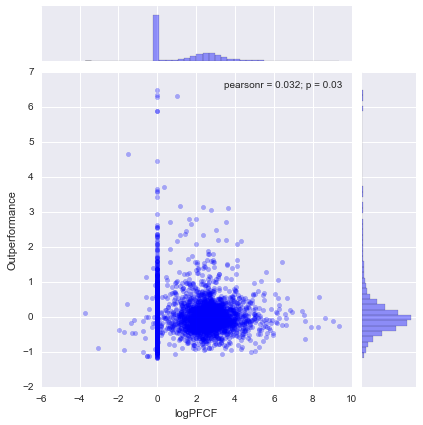

In [13]:
sns.jointplot(data_long['logPFCF'],data_long['Outperformance'], color = 'blue',alpha = 0.3)

### 2.5 Industry

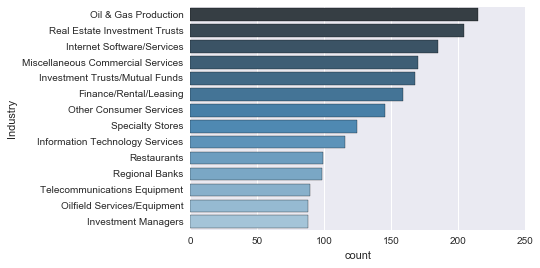

In [14]:
sns.countplot(y="Industry",data=data,order=data['Industry'].value_counts().iloc[:14].index,palette='Blues_d')

### 2.7 Market cap

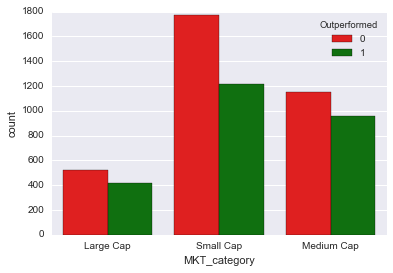

In [15]:
sns.countplot(x="MKT_category",data=data,hue='Outperformed',palette={0:"r", 1:"g"})

### 2.8 Region

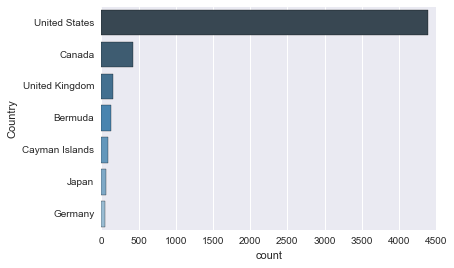

In [16]:
sns.countplot(y="Country",data=data, order=data['Country'].value_counts().iloc[:7].index,palette='Blues_d')

### 2.9 Value over time

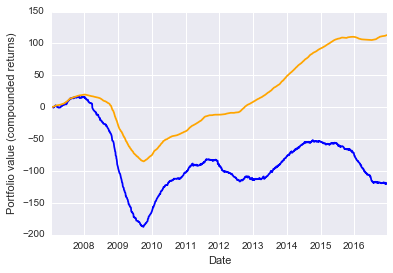

In [17]:
cum_return = np.log(1+performance_mean).cumsum()
cum_index_return = np.log(1+index_performance_mean).cumsum()
plt.figure()
plt.plot(date, cum_return, color='blue')
plt.plot(date, cum_index_return, color ='orange')
plt.xlabel('Date')
plt.ylabel('Portfolio value (compounded returns)')

In [18]:
len(cum_return)

2297

In [19]:
len(cum_index_return)

2297